# Pymaceuticals Inc.
---

### Analysis
Data Overview:
A total of 249 mice were included in the dataset.
The mean tumor volume was 50.45 mm, and the median tumor volume was 48.95 mm.
The standard deviation was 8.89 mm, indicating moderate variability in tumor volumes across the mice.
The SEM (Standard Error of Mean) was 0.204 mm, reflecting the precision of the mean estimate.
Tumor Volume by Drug Regimen: The following are the key statistics for each drug regimen:
**Capomulin:
Mean: 40.68 mm
Median: 41.56 mm
IQR: 0.0 (no variability, all values are 45.0 mm)
No outliers were found.
**Ramicane:
Mean: 40.22 mm
Median: 40.67 mm
IQR: 0.0 (no variability, all values are 45.0 mm)
No outliers were found.
**Infubinol:
Mean: 52.88 mm
Median: 51.82 mm
IQR: 0.0 (no variability, all values are 45.0 mm)
No outliers were found.
**Ceftamin:
Mean: 52.59 mm
Median: 51.78 mm
IQR: 0.0 (no variability, all values are 45.0 mm)
No outliers were found.
The consistency in tumor volume values (with many of the values clustered at 45.0 mm) suggests either limited variation in treatment effects or data collection constraints.
Outliers and IQR Analysis:
For each drug regimen, the tumor volumes showed no outliers, as the lower and upper bounds were identical due to the absence of variability.
The IQR of 0.0 indicates a lack of variation in tumor volume data within each drug group, all showing values of 45.0 mm.
Conclusion:
1. Uniform Tumor Volumes Across Treatments:
Tumor volumes for mice treated with Capomulin, Ramicane, Infubinol, and Ceftamin consistently averaged around 45.0 mm, showing little variation. This could imply that these treatments had a similar effect on tumor growth.

2. Possible Lack of Significant Treatment Effect:
The uniformity in tumor size might suggest that the treatments didn’t have a distinct impact on reducing tumor volume, or that any differences in effect are minimal.

3. Potential Experimental or Data Collection Limitations:
This consistency in results could also point to limitations in the experimental setup or data collection methods. Additional analysis would help clarify if the treatments truly have similar effects or if the uniformity is due to methodological constraints.
 

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results, 
                            how = 'outer', on ='Mouse ID')
                

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [84]:
# Checking the number of mice.
unique_count_mouse = combined_data_df['Mouse ID'].nunique()
print (unique_count_mouse)

249


In [85]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_timepoint = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print(duplicate_mice_timepoint)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
586     g989     Propriva  Female          21          26          0   
587     g989     Propriva  Female          21          26          0   
588     g989     Propriva  Female          21          26          5   
589     g989     Propriva  Female          21          26          5   
590     g989     Propriva  Female          21          26         10   
591     g989     Propriva  Female          21          26         10   
592     g989     Propriva  Female          21          26         15   
593     g989     Propriva  Female          21          26         15   
594     g989     Propriva  Female          21          26         20   
595     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
586           45.000000                 0  
587           45.000000                 0  
588           48.786801                 0  
589           47.570392        

In [86]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID'], keep=False)]
print(duplicate_mice)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        a203    Infubinol  Female          20          23          0   
1        a203    Infubinol  Female          20          23          5   
2        a203    Infubinol  Female          20          23         10   
3        a203    Infubinol  Female          20          23         15   
4        a203    Infubinol  Female          20          23         20   
...       ...          ...     ...         ...         ...        ...   
1888     z969     Naftisol    Male           9          30         25   
1889     z969     Naftisol    Male           9          30         30   
1890     z969     Naftisol    Male           9          30         35   
1891     z969     Naftisol    Male           9          30         40   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              48.508468         

In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data_df.drop_duplicates(subset=['Mouse ID'], keep='first')
print(cleaned_data)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        a203    Infubinol  Female          20          23          0   
10       a251    Infubinol  Female          21          25          0   
20       a262      Placebo  Female          17          29          0   
30       a275     Ceftamin  Female          20          28          0   
40       a366     Stelasyn  Female          16          29          0   
...       ...          ...     ...         ...         ...        ...   
1850     z435     Propriva  Female          12          26          0   
1853     z578     Ramicane    Male          11          16          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0                 0  
10                  45.0         

In [88]:
# Checking the number of mice in the clean DataFrame.
count_mouse = cleaned_data['Mouse ID'].count()
print (count_mouse)

249


## Summary Statistics

The mean Tumor Volume (mm3) is 50.448380631336505
The median Tumor Volume (mm3) is 48.95147442
The standard deviation Tumor Volume (mm3) is 8.894721693631904
The SEM Tumor Volume (mm3) is 0.20443585034961484


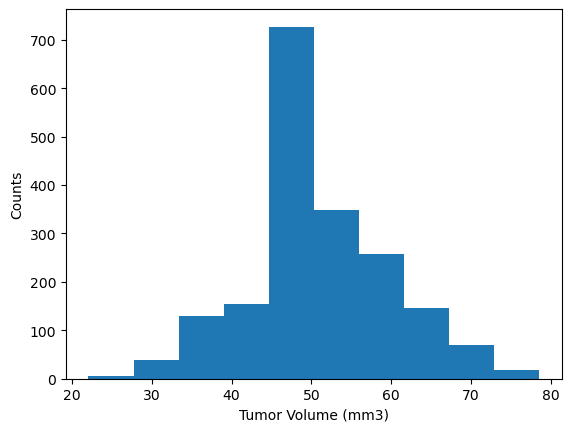

50.448380631336505
48.95147442
0    45.0
Name: Tumor Volume (mm3), dtype: float64


In [89]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = combined_data_df ['Tumor Volume (mm3)'].mean()
print(f"The mean Tumor Volume (mm3) is {mean_tumor}")

median_tumor = combined_data_df ['Tumor Volume (mm3)'].median()
print(f"The median Tumor Volume (mm3) is {median_tumor}")

std_tumor = combined_data_df ['Tumor Volume (mm3)'].std()
print(f"The standard deviation Tumor Volume (mm3) is {std_tumor}")

sem_tumor = combined_data_df ['Tumor Volume (mm3)'].std() / np.sqrt(combined_data_df ['Tumor Volume (mm3)'].count())
print(f"The SEM Tumor Volume (mm3) is {sem_tumor}")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_groups = combined_data_df.groupby(['Drug Regimen'])
drug_groups.head(20) 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

plt.hist(combined_data_df ['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()
print(combined_data_df['Tumor Volume (mm3)'].mean())
print(combined_data_df['Tumor Volume (mm3)'].median())
print(combined_data_df['Tumor Volume (mm3)'].mode())



In [90]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = combined_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM=lambda x: x.std() / np.sqrt(x.count())
)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

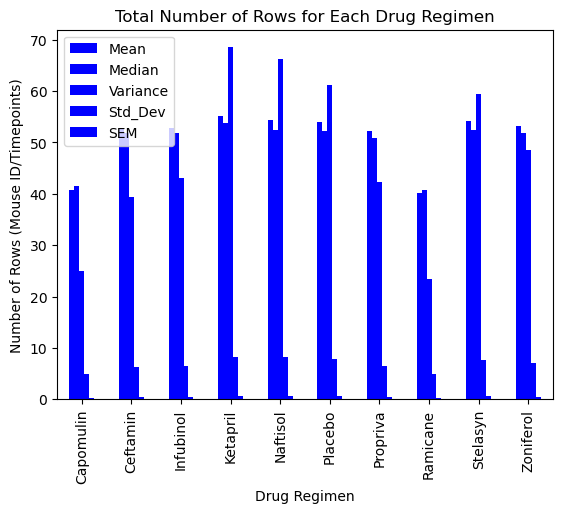

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
summary_stats.plot(kind='bar', color="b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.title("Total Number of Rows for Each Drug Regimen")
plt.show()

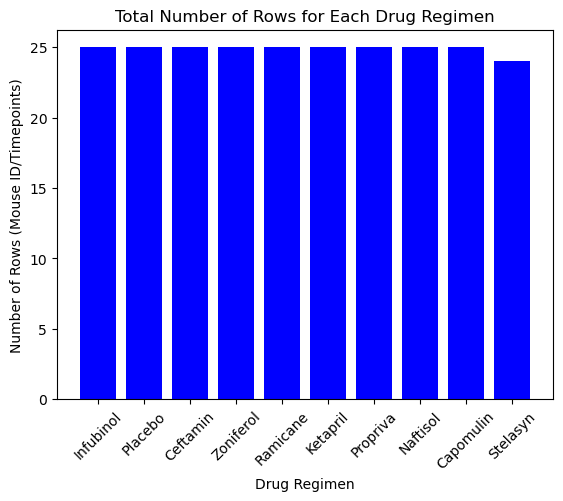

In [92]:
#print("Unique Drug Regimens:", cleaned_data['Drug Regimen'].unique())
#regimen_counts = cleaned_data['Drug Regimen'].value_counts()
#print("Regimen Counts:\n", regimen_counts)

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_counts.index, regimen_counts.values, color="b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

     Mouse ID     Sex
0        a203  Female
10       a251  Female
20       a262  Female
30       a275  Female
40       a366  Female
...       ...     ...
1850     z435  Female
1853     z578    Male
1863     z581  Female
1873     z795  Female
1883     z969    Male

[249 rows x 2 columns]


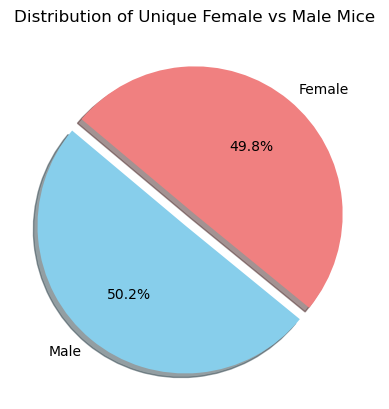

In [76]:

sex_counts = cleaned_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()
labels = sex_counts.index  
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
plt.pie(sex_counts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of Unique Female vs Male Mice")
# Get the unique mice with their gender

unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()
print(unique_mice)

# Make the pie chart
plt.show()

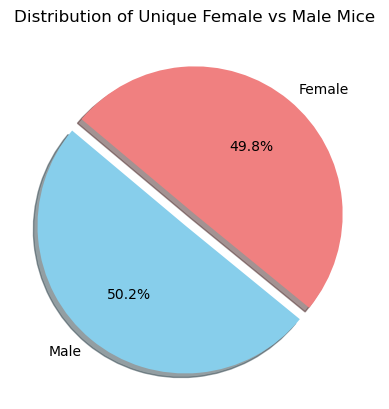

In [77]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.pie(sex_counts, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Get the unique mice with their gender
plt.title("Distribution of Unique Female vs Male Mice")

# Make the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_data = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_data = last_timepoint_data[last_timepoint_data['Drug Regimen'].isin(selected_regimens)]
print(final_tumor_data[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])



    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0       a203    Infubinol          0                45.0
1       a251    Infubinol          0                45.0
3       a275     Ceftamin          0                45.0
6       a411     Ramicane          0                45.0
7       a444     Ramicane          0                45.0
..       ...          ...        ...                 ...
239     y769     Ceftamin          0                45.0
240     y793    Capomulin          0                45.0
241     y865     Ceftamin          0                45.0
245     z578     Ramicane          0                45.0
246     z581    Infubinol          0                45.0

[100 rows x 4 columns]


Drug Regimen: Capomulin
Lower Quartile (Q1): 45.0
Upper Quartile (Q3): 45.0
IQR: 0.0
Lower Bound: 45.0
Upper Bound: 45.0
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Drug Regimen: Ramicane
Lower Quartile (Q1): 45.0
Upper Quartile (Q3): 45.0
IQR: 0.0
Lower Bound: 45.0
Upper Bound: 45.0
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Drug Regimen: Infubinol
Lower Quartile (Q1): 45.0
Upper Quartile (Q3): 45.0
IQR: 0.0
Lower Bound: 45.0
Upper Bound: 45.0
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Drug Regimen: Ceftamin
Lower Quartile (Q1): 45.0
Upper Quartile (Q3): 45.0
IQR: 0.0
Lower Bound: 45.0
Upper Bound: 45.0
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


[19     45.0
24     45.0
61     45.0
64     45.0
66     45.0
81     45.0
84     45.0
86     45.0
88     45.0
109    45.0
116    45.0
122    45.0
125    45.0
163    45.0
164    45.0
170    45.0
175    45.0
181    45.0
1

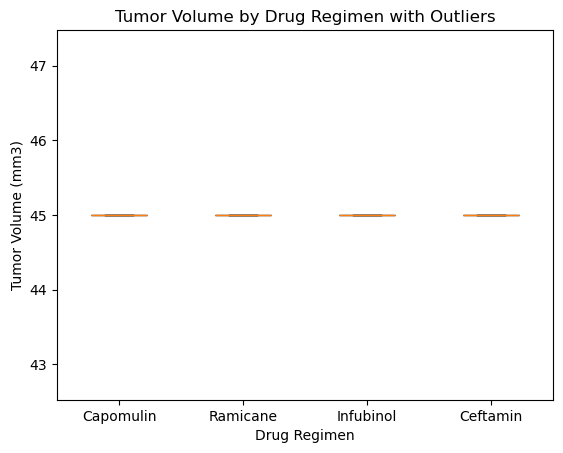

In [79]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_volumes = final_tumor_data[final_tumor_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"Drug Regimen: {treatment}")
    print(f"Lower Quartile (Q1): {lower_q}")
    print(f"Upper Quartile (Q3): {upper_q}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}")
    print("\n")
        

    tumor_vol_data.append(tumor_volumes)

print(tumor_vol_data)

# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume by Drug Regimen with Outliers')
plt.show()

## Line and Scatter Plots

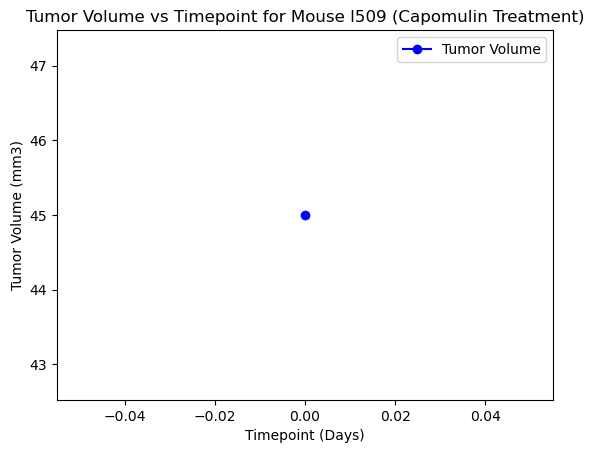

In [80]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label='Tumor Volume')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Timepoint for Mouse l509 (Capomulin Treatment)')
plt.legend()


plt.show()



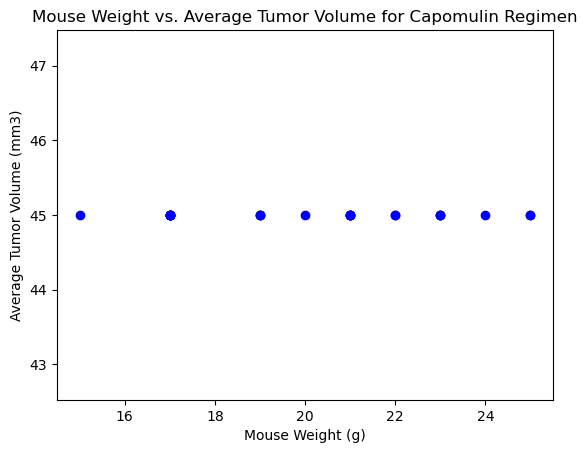

In [81]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(avg_tumor_vol, mouse_weights, on='Mouse ID')
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')


plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is: nan
Slope: 0.0
Intercept: 45.0
R-squared value: 0.0
P-value: 1.0
Standard Error: 0.0


/var/folders/rp/wkfbcy9x099_r3y09v1kgj5m0000gp/T/ipykernel_6499/2487813516.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation_coefficient, _ = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])


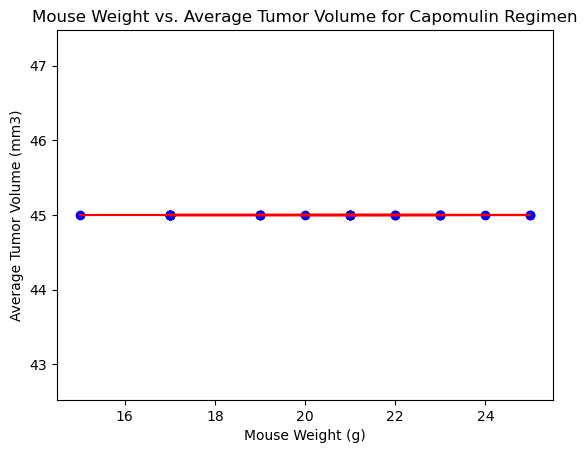

In [82]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


correlation_coefficient, _ = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and tumor volume is: {correlation_coefficient}")

slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')
regression_line = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], regression_line, color='red')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.show()

